<a href="https://colab.research.google.com/github/qhqnf/Financial-Engineering/blob/master/option_winning_rate_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy scipy matplotlib

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from math import sqrt

print(f"Hello Numpy {np.__version__}!")

Hello Numpy 1.19.5!


In [ ]:
#@title Enter Current KOSPI200 Index { display-mode: "form" }

# enter implied volatility or VIX index
kospi200 =  425#@param {type:"number"}

In [ ]:
#@title Enter Volatility or VIX index { display-mode: "form" }

# enter implied volatility or VIX index
volatility =  15#@param {type:"number"}

In [ ]:
#@title Enter winning rate you want { form-width: "50%", display-mode: "form" }

# enter winning rate
winning_rate = 0.7 #@param {type:"slider", min:0.01, max:0.99, step:0.01}

In [ ]:
print(f"Volatility: {volatility}\nWinning rate: {winning_rate}")

Volatility: 15
Winning rate: 0.7


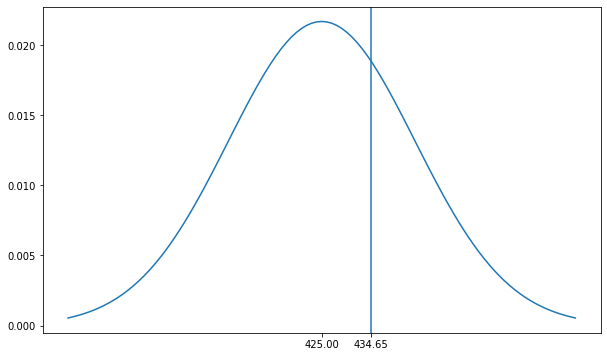

In [ ]:
%matplotlib inline

# normal distribution pdf parameter
mu = kospi200
sigma = (mu * volatility / 100) / sqrt(12)

# normal distribution object
norm_dist = stats.norm(loc=mu, scale=sigma)

# x point matching for winning rate
# ppf is for inverse cdf
strike_price = mu + stats.norm.ppf(winning_rate) * sigma

# x axis for plot
range = 50
x = np.linspace(mu-range, mu+range, 101)

# plot parameter
plt.figure(figsize=(10, 6))

ax = plt.subplot()
ax.set_xticks([mu, strike_price])

plt.plot(x, norm_dist.pdf(x))
plt.axvline(x=strike_price)
# print(plt.xticks().append(strike_price))